# Intro to Spatial Data Science #sds4gdsp

## 0. Setup

In [54]:
import random
random.seed(2023) # for reproducibility
import leafmap # for visualizing maps
import osmnx as ox # for processing graph-like datasets
import networkx as nx # for processing graph-like datasets
import pandas as pd # for processing tabular data
pd.options.display.max_colwidth=200
pd.options.display.max_columns=100
import matplotlib.pyplot as plt
import geopandas as gpd # for processing geographic tables
from shapely.geometry import (
    Point, LineString, Polygon
) # for processing native geometries
from itertools import combinations

## 1. README

### a. Prework.

By this time around, you should already be comfortable in writing code using Python, installing different packages from PyPI, and using virtual environments (conda, venv, poetry, etc). Please execute the following steps in your local machine:

1. Clone the **sds4gdsp** github repository from this link
```git clone https://github.com/jpacil0/sds4gdsp.git```

2. Create a conda environment named **gdsenv** with **python=3.8.16**
```conda create --name gdsenv python=3.8.16```

3. Install **jupyterlab** in that environment, we will use this for the workshop
```pip install jupyterlab```

4. Install the packages from the **requirements.txt**, follow the **README.md**
```pip install -r requirements.txt```

5. Setup jupyter for rendering leaflet maps
```conda install -c conda-forge ipyleaflet``` <br>
```jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet```

### b. Learning Objectives.

This lecture provides DSP cadets with little-to-no prior knowledge core competences in Spatial Data Science (SDS).

1. Advancing their numerical, computational, and statistical literacy.

2. Introducing basic principles of programming and state-of-the-art (SOTA) computational tools for SDS.

3. Presenting a comprehensive overview of the main methodologies available to the Spatial Data Scientist, as well as their intuition as to how and when they can be applied.

4. Focusing on real world applications of these techniques in a geographical and applied context.

### c. Learning Outcomes.

By the end of the lecture & workshop, DSP students will be able to:

1. Demonstrate fundamental spatial data science concepts and be able to use the tools programmatically to import, manipulate and analyze spatial data in different formats.

2. Understand the motivation and inner workings of the main methodological approcahes of SDS, both analytical and visual.

3. Apply spatial analysis techniques and explain how to interpret the results, in a process of turning data into information.

## 2. What makes this subject so spatial?

### a. SDS aims to answer the twofold question - where and why things happen.

Spatial Data Science is interested in understanding both where certain things happen and why they happen in those places. To do this, Spatial Data Scientists leverage location, distance, and spatial interactions as core aspects of the data they work with and use highly specialized methods and cutting-edge software to analyze, visualize, and draw actionable insights from various spatial use cases. 

### b. SDS is the intersection of Data Science (DS) and Geographic Information System (GIS).

GIS is a niche field that refers to different types of information systems, such as websites, apps, or databases for storing and processing spatial datasets. Today, Spatial Data Scientists use GIS as part of a wider, more modern tech stack allowing them to do more advanced statistical- and modeling-based analyses while also being able to leverage the latest artificial intelligence and machine learning techniques more effectively.

### c. Only 1 in 3 Data Scientists claiming to be experts in spatial analysis.

Spatial Data Science is clearly still a niche area of data science, it is nonetheless an attractive area for organizations to explore and focus on in the years ahead. According to this survey, 9 in 10 of the industries surveyed (telco, software & tech, consulting, cities & government, etc.)
- have a difficult time finding, recruiting, and hiring talent with SDS in their toolbelt  
- are very likely to increase their investment in SDS for the next two years

## 3. How can I relate this to my work in Globe? 

### a. Geo-spatial data in the telco universe (even outside) is ubiquitous.

Here are some examples of geospatial data you can encounter in telco world.

*Point* representation

- Globe cellsites
- Globe fiber NAPs
- Globe physical stores
- Globe sub households
- Globe blitz deployments
- Globe OOH advertisements
- Building footprints

*Polygon* representation

- PH admin boundaries
- Globe cellsite coverage areas
- Globe fiber coverage areas
- Custom enumeration units (grids, hexagons, etc)
- Competitor coverage estimates

*Graph* representation

- PH road networks
- Globe fiber wiring connections
- WW internet submarine cabling

In [74]:
?ox.graph_from_point

Signature:
ox.graph_from_point(
    center_point,
    dist=1000,
    dist_type='bbox',
    network_type='all_private',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    clean_periphery=True,
    custom_filter=None,
)
Docstring:
Create a graph from OSM within some distance of some (lat, lng) point.

Parameters
----------
center_point : tuple
    the (lat, lng) center point around which to construct the graph
dist : int
    retain only those nodes within this many meters of the center of the
    graph, with distance determined according to dist_type argument
dist_type : string {"network", "bbox"}
    if "bbox", retain only those nodes within a bounding box of the
    distance parameter. if "network", retain only those nodes within some
    network distance from the center-most node (requires that scikit-learn
    is installed as an optional dependency).
network_type : string, {"all_private", "all", "bike", "drive", "drive_service", "walk"}
    what type of street n

In [80]:
# origin point of query
# the globe tower @ bgc taguig
center_point = (14.553514, 121.050110)
dist = 1_000 # radius in meters
dist_type = "bbox" # capture nodes w/in bounding box
retain_all = False # filter only connected components
simplify = True # simplify network topology
network_type = "drive" # include driveable roads
G = ox.graph_from_point(
    center_point, dist, dist_type, network_type, simplify, retain_all
)
print(f"number of nodes in the graph: {len(G.nodes)}")

number of nodes in the graph: 476


<Axes: >

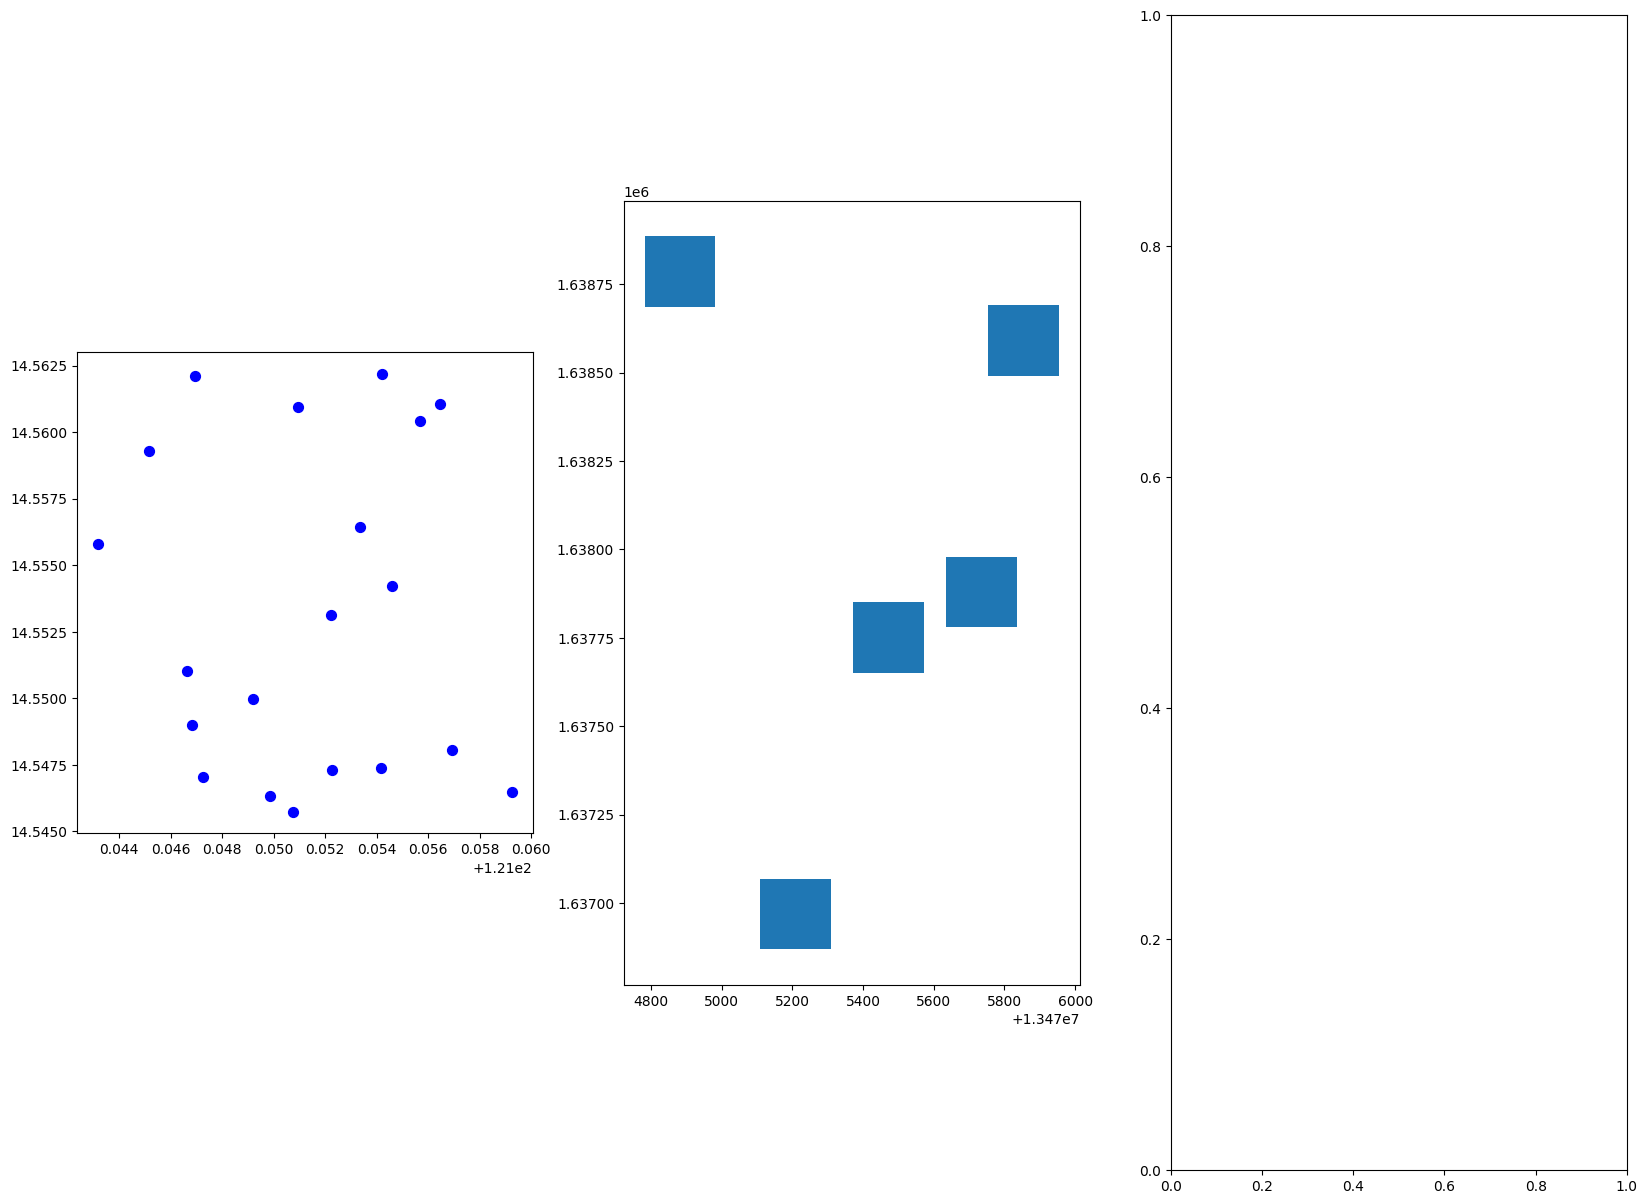

In [209]:
sample_size = 20
sample_nodes = random.sample(G.nodes, sample_size)
sample_coords = [(G.nodes[uid]["y"], G.nodes[uid]["x"]) for uid in sample_nodes]

data = pd.DataFrame(sample_coords, columns=["lat", "lng"])
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(data.lng, data.lat), crs=4326)

fig, ax = plt.subplots(1, 3, figsize=(20, 15))

# points example
gdf_points = gdf.copy()
gdf_points.plot(ax=ax[0], markersize=50, color="blue")

# geometry example
sample_size_with_buffer = 5
gdf_geoms = gdf.sample(sample_size_with_buffer).to_crs(3857).buffer(100, cap_style=3)
gdf_geoms.plot(ax=ax[1])
# gdf_geoms.plot(ax=ax[1], markersize=50, color="red", alpha=0.2)
# gdf.to_crs(3857).plot(ax=ax[1], markersize=50, color="blue")

# graph example
# random.shuffle(sample_nodes)
# sample_nodes_pairs = list(combinations(sample_nodes, 2))
# gdf.plot(ax=ax[2], markersize=50, color="blue");

In [ ]:
nx.shortest_path(
    G,
    3254806301,
    1117877215,
    method="dijkstra",
    weight="length"
)

[3254806301,
 3254806291,
 32542775,
 2462250734,
 336016007,
 253050736,
 253051040,
 369918490,
 369918455,
 1926870767,
 355576854,
 1117858178,
 1117858179,
 655323913,
 6991898410,
 6991898418,
 1117877215]

In [64]:
# the globe tower @ bgc taguig
COORD_TGT = (14.553514712958846, 121.0501101377172)

# query the road network around TGT
G = ox.graph_from_point(
    center_point=COORD_TGT, # origin point of query
    dist=1_000, # radius in meters from the origin
    dist_type="bbox", # capture nodes w/in bounding box
    retain_all=False, # filter only connected components
    simplify=True, # simplify network topology
    network_type="drive" # filter to drivable roads
)

# sample a node from the graph
nodes = list(G.nodes())
random.shuffle(nodes)
print(len(nodes))

# generate pairwise o/d combinations of the nodes
node_pairwise_combo = list(combinations(nodes, 2))
print(len(node_pairwise_combo))

475
112575


In [60]:
node_pairwise_combo[0]

(320432090, 370593298)

In [62]:
nx.shortest_path_length(
    G=G,
    source=node_pairwise_combo[0][0],
    target=node_pairwise_combo[0][1],
    method="dijkstra",
    weight="length"
)

1510.514

In [35]:
sample_node = G.nodes[random.sample(nodes, 1)[0]]
sample_lat, sample_lng = sample_node["y"], sample_node["x"]

In [36]:
sample_lat, sample_lng

(14.557832, 121.0425191)

#### Point-based example

In [10]:
M = leafmap.Map(center=COORD_TGT, zoom=14, height="400px", width="800px")
M.add_circle_markers_from_xy(

In [13]:
M.add_circle_markers_from_xy?

Signature:
M.add_circle_markers_from_xy(
    data,
    x='longitude',
    y='latitude',
    radius=10,
    popup=None,
    **kwargs,
)
Docstring:
Adds a marker cluster to the map. For a list of options, see https://ipyleaflet.readthedocs.io/en/latest/api_reference/circle_marker.html

Args:
    data (str | pd.DataFrame): A csv or Pandas DataFrame containing x, y, z values.
    x (str, optional): The column name for the x values. Defaults to "longitude".
    y (str, optional): The column name for the y values. Defaults to "latitude".
    radius (int, optional): The radius of the circle. Defaults to 10.
    popup (list, optional): A list of column names to be used as the popup. Defaults to None.
File:      ~/opt/anaconda3/envs/gdsenv/lib/python3.8/site-packages/leafmap/leafmap.py
Type:      method


In [12]:
dir(M)

['_ENV_VARS',
 '__add__',
 '__annotations__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active_widgets',
 '_add_notifiers',
 '_all_trait_default_generators',
 '_basemap_metadata',
 '_call_widget_constructed',
 '_comm_changed',
 '_compare',
 '_control_comm',
 '_control_ids',
 '_cross_validation_lock',
 '_default_dragging_style',
 '_default_keys',
 '_default_layers',
 '_default_options',
 '_descriptors',
 '_dom_classes',
 '_fit_bounds',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_get_trait_default_generator',
 '_handle_control_comm_msg',
 '_handle_custom_msg',
 '_handle_leaflet_event',
 '

<img src="../docs/imgs/cellsite.jpeg" alt="Drawing" style="width: 400px;"/>

#### Graph-based example

In [40]:
ox.plot_graph?

Signature:
ox.plot_graph(
    G,
    ax=None,
    figsize=(8, 8),
    bgcolor='#111111',
    node_color='w',
    node_size=15,
    node_alpha=None,
    node_edgecolor='none',
    node_zorder=1,
    edge_color='#999999',
    edge_linewidth=1,
    edge_alpha=None,
    show=True,
    close=False,
    save=False,
    filepath=None,
    dpi=300,
    bbox=None,
)
Docstring:
Plot a graph.

Parameters
----------
G : networkx.MultiDiGraph
    input graph
ax : matplotlib axis
    if not None, plot on this preexisting axis
figsize : tuple
    if ax is None, create new figure with size (width, height)
bgcolor : string
    background color of plot
node_color : string or list
    color(s) of the nodes
node_size : int
    size of the nodes: if 0, then skip plotting the nodes
node_alpha : float
    opacity of the nodes, note: if you passed RGBA values to node_color,
    set node_alpha=None to use the alpha channel in node_color
node_edgecolor : string
    color of the nodes' markers' borders
node_zord

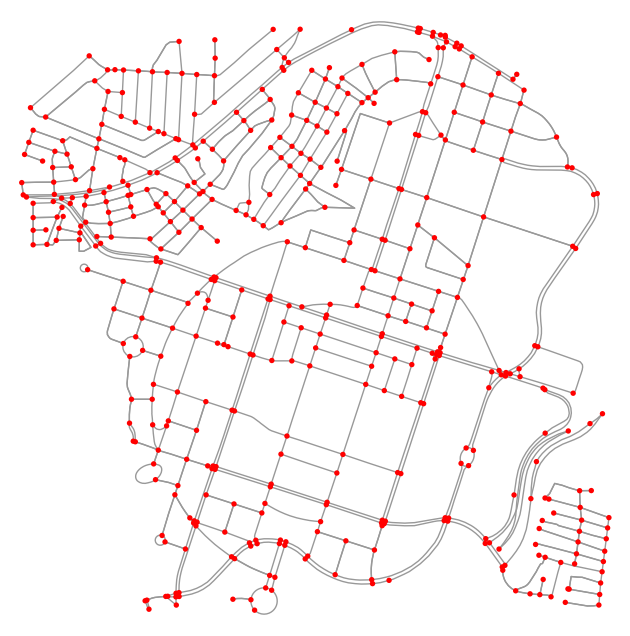

In [41]:
ox.plot_graph(G, bgcolor="white", node_color="red");

## 4. Dev notes and programming hacks

## 5. References

1. https://carto.com/what-is-spatial-data-science